In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import RL_formulation as rl
import agent_arch as arch

In [3]:
num_of_steps = 24
env = rl.Environment()
agent = arch.Agent()

In [4]:
import copy

In [5]:
#===================================

# CMA-ES DRL pol_searche

In [6]:
import pickle

In [ ]:
file_params = open('serialised_data_CMAES_MarkovDelta_t/best_params.pkl', 'rb')
best_solution = pickle.load(file_params)
file_params.close()

In [ ]:
print(max(best_solution))
print(min(best_solution))

In [ ]:
random_solution = np.random.rand(8060,1) * 6 - 3

In [ ]:
# builde agent
# best_solution = best_solution / np.linalg.norm(best_solution)
agent.updateParams(best_solution)

In [ ]:
print(best_solution)

In [ ]:
[[states, actions, total_reward],
 [desired_total_Production_in_dinamics,
  total_Production_in_dinamics,
  run_out_of_elecs]]                   = rl.generate_episode(env, agent, num_of_steps, show=True, simple_action=False)

In [ ]:
#print(states)


In [ ]:
#print(actions)

In [ ]:
print(total_reward) # -37057

In [ ]:
num_of_switches = []
# total_run_out_for_elecs = []
for j in range(env.num_of_elecs):
    # total_run_out_for_elecs.append(env.Plant[j].total_run_out)
    num_of_switches.append(env.Plant[j].switch_num)

Production_Error_in_dinamics = np.array(desired_total_Production_in_dinamics) - np.array(total_Production_in_dinamics)


In [ ]:
total_run_out_for_elecs = [0] * env.num_of_elecs
for j in range(env.num_of_elecs):
    total_run_out_for_elecs[j] = env.Plant[j].total_run_out
total_run_out_for_elecs = np.array(total_run_out_for_elecs)

In [ ]:
reward_account = rl.Reward()

In [ ]:
[neg_J, MSE, mean_error, asymetric_error,
max_total_run_out,
run_out_deviation_RMSE] = reward_account.account(Production_Error_in_dinamics, total_run_out_for_elecs)


print('=========================== SCORE')
print('neg_J = ' + str(neg_J))
print('RMSE = ' + str(MSE**0.5))
print('mean_error = ' + str(mean_error))
print('asymetric_error = ' + str(asymetric_error))
print('max_total_run_out = ' + str(max_total_run_out))
#print(min_max_tot_run_out)
print('run_out_deviation_RMSE = ' + str(run_out_deviation_RMSE))
print("switc num = ", end=' ')
print(num_of_switches)
print(sum(num_of_switches))
print(max(total_run_out_for_elecs) / sum(total_run_out_for_elecs))


# neg_J = -37.486206498875475
# RMSE = 113.42800583990666
# mean_error = 45.728692401552536
# asymetric_error = 8364.453235023235
# max_total_run_out = 66959.69999998627
# run_out_deviation_RMSE = 10593.05373451876
# switc num =  [12, 12, 7, 9, 9]
# 49
# 0.24433905187558372



In [ ]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(desired_total_Production_in_dinamics, label='I_ref')
plt.plot(total_Production_in_dinamics, label='I')
plt.legend()
plt.grid(visible=True)

In [ ]:
names = list(range(env.num_of_elecs))
plt.figure(figsize=(30, 15))
plt.bar(names, total_run_out_for_elecs)
plt.show()

# MPC

In [5]:
#=================

env.reset(24)

array([0.61493048, 0.19333078, 0.30619268, 0.13275779, 0.22714618,
       0.36226492, 0.05401321, 0.76306846, 0.48036097, 0.56847444,
       0.016559  , 0.47746809, 1.        , 0.30634292, 0.        ,
       0.63358   , 0.44678263, 1.        , 0.91789739, 0.08519981,
       0.        , 0.29888081, 0.05573856, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.38602941,
       0.38602941, 0.38602941, 0.38602941, 0.38602941, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.     

In [6]:
curve_of_desired_total_PR = copy.deepcopy(env.PRref_noised)
Plant = copy.deepcopy(env.Plant)
Delta_t = copy.deepcopy(env.Delta_t)
delta_t = copy.deepcopy(env.delta_t)

In [7]:
curve_of_desired_total_PR

array([307.46523766,  96.66538894, 153.09633765,  66.3788954 ,
       113.57308846, 181.13246133,  27.0066048 , 381.53422811,
       240.1804829 , 284.23721999,   8.2794995 , 238.73404525,
       500.        , 153.17146058,   0.        , 316.78999952,
       223.39131649, 500.        , 458.94869417,  42.59990315,
         0.        , 149.44040581,  27.86927981,   0.        ])

In [8]:
desired_total_Production_in_dinamics = []

In [9]:


n = len(Plant)
N = len(curve_of_desired_total_PR)

In [10]:

for k in range(N):
    desired_total_Production_in_dinamics.extend(curve_of_desired_total_PR[k] * np.ones(int(Delta_t / delta_t)))


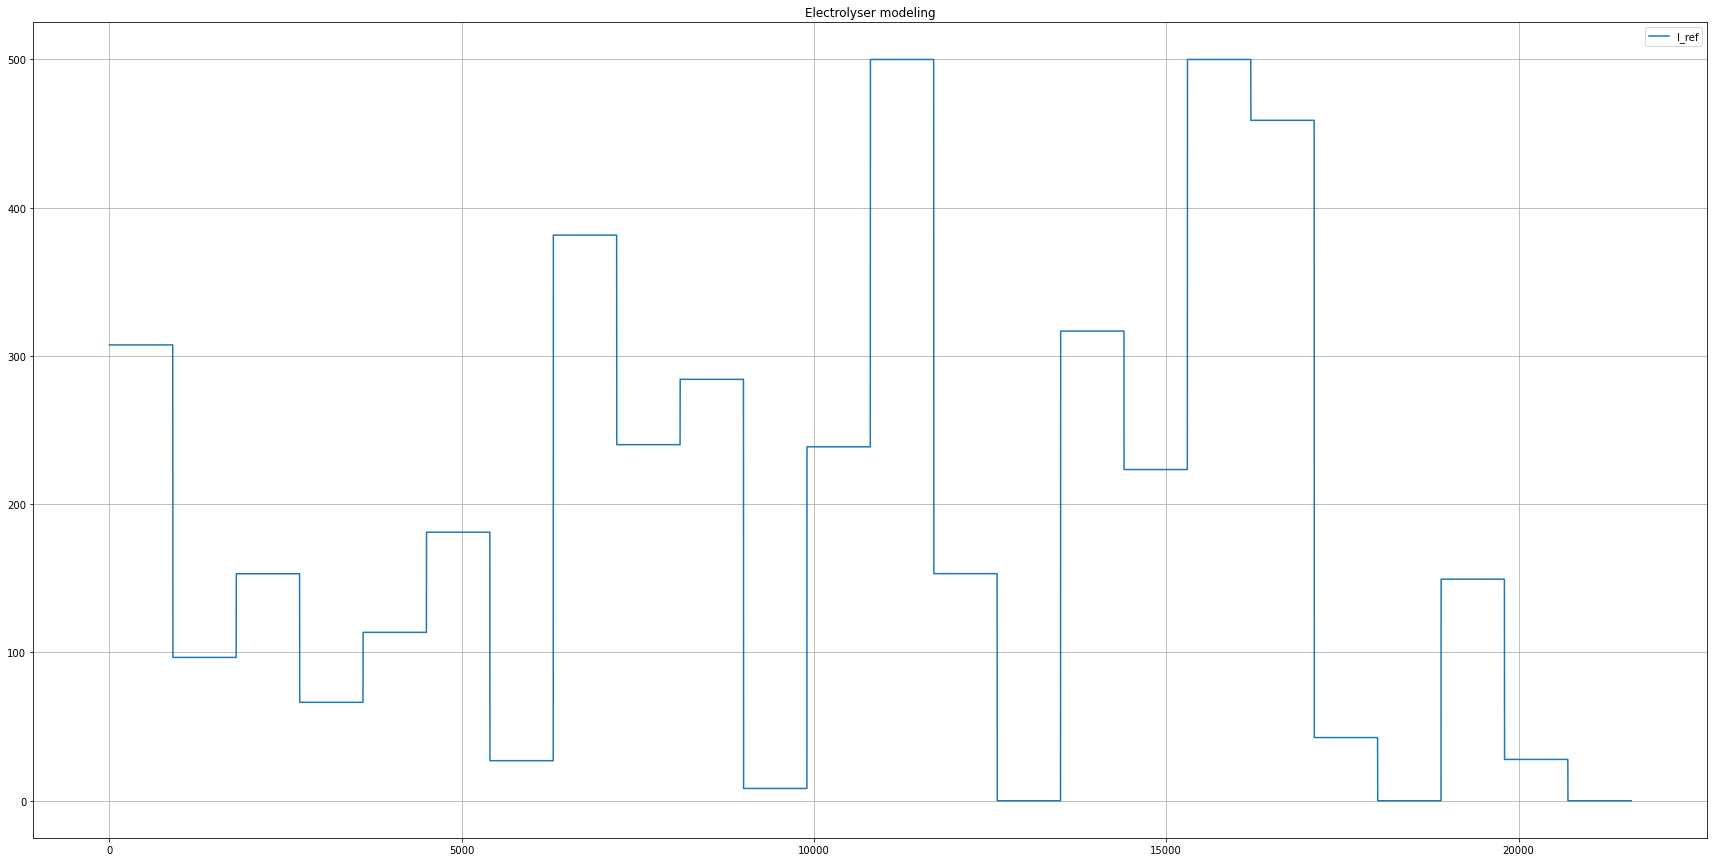

In [11]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(desired_total_Production_in_dinamics, label='I_ref')
# plt.plot(total_Production_in_dinamics, label='I')
plt.legend()
plt.grid(visible=True)

In [12]:
local_Plant_for_search = copy.deepcopy(Plant)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 120 (seed=775429, Fri Apr 22 11:49:59 2022)
0  ==>> -55.83599474669194 === -55.8335948106905 === 0.4815751435234226 === min-max = -1.280283077859356 -- 1.0465706028147712
1  ==>> -55.5983501867125 === -55.595787482746076 === 0.46629934306455106 === min-max = -1.4596166107179362 -- 1.094522684302217
2  ==>> -55.176276172742234 === -55.173135757401724 === 0.4548015835722998 === min-max = -1.6189504891847903 -- 1.4044651460512083
3  ==>> -51.81259716662054 === -51.80918588131351 === 0.44557191549328307 === min-max = -1.3230677088458536 -- 1.2849999135529928
4  ==>> -50.992156814391365 === -50.988986022061134 === 0.4377823094501149 === min-max = -1.3093404469858412 -- 1.0435860794274143
5  ==>> -49.36064479457026 === -49.3560707538508 === 0.43315217156164615 === min-max = -1.5415690149990124 -- 1.2001663200016006
6  ==>> -47.455346338773154 === -47.4515034556343 === 0.42941511445787256 === min-max = -1.4842324578027644 -- 0.9741367705198795

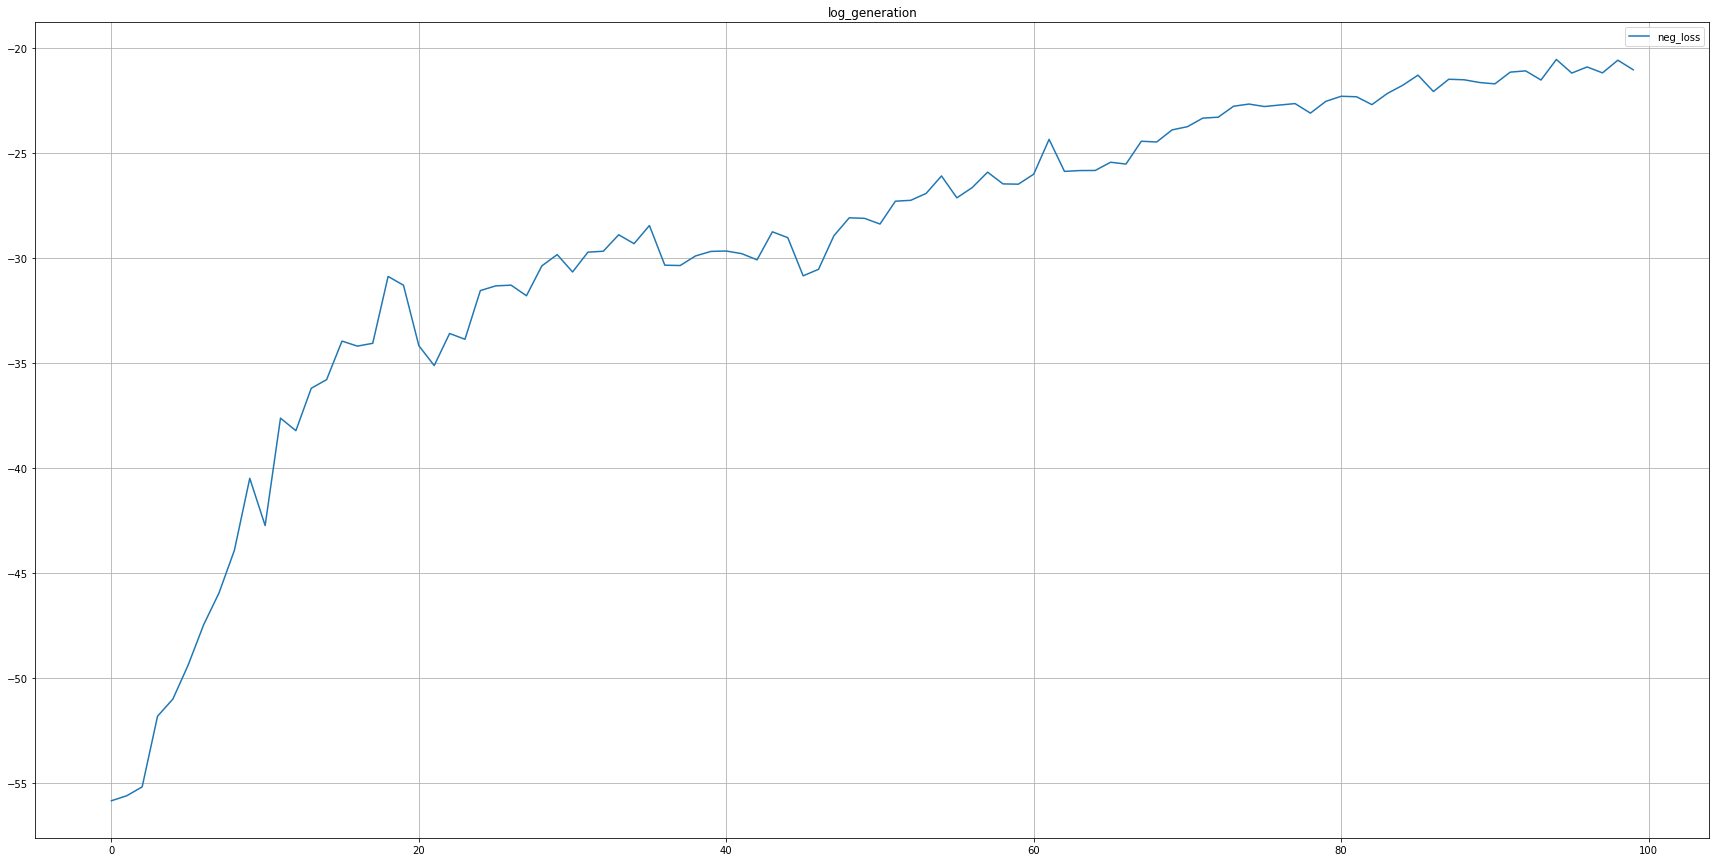

CPU times: user 48.2 s, sys: 2.41 s, total: 50.6 s
Wall time: 5min 39s


In [13]:
%%time

[action,
 U_for_N_Delta_t,
 best_solution_score] = agent.getAction_OnlineOptimization(curve_of_desired_total_PR, local_Plant_for_search, Delta_t, delta_t, parallel = True)

In [13]:
print(U_for_N_Delta_t)

[array([75.80914495, 69.21036798, 73.64820441, 87.82100473, 80.33117486]), array([ 86.11554702,  76.46722653,  78.90828218,  76.98432737,
       100.        ]), array([0., 0., 0., 0., 0.]), array([65.58530845,  0.        ,  0.        , 68.93037361,  0.        ]), array([ 73.68164566,  79.18689345,  88.0726462 ,   0.        ,
       100.        ]), array([ 76.42543167,  87.70459179,  97.31009446, 100.        ,
        75.69586445]), array([65.86452102,  0.        , 70.73188451, 62.6564338 , 96.23055065]), array([ 0.        ,  0.        , 66.61625411,  0.        ,  0.        ]), array([ 82.73853659,   0.        ,   0.        , 100.        ,
         0.        ]), array([65.49127413, 70.68668626, 65.69731261, 77.48915509, 65.42150484]), array([97.54464856, 76.79297392, 74.28388831, 85.13526186, 89.85759675]), array([69.78951001, 80.35927322,  0.        , 75.58769869, 67.77172676]), array([79.65622848, 87.5698387 , 72.14092053, 81.15476429, 83.0293264 ]), array([100.        ,  98.61217994,

In [ ]:
total_Production_in_dinamics = []

run_out_of_elecs_before = [elec.total_run_out for elec in Plant]


In [ ]:
def make_step(U, Plant):
    for i in range(int(Delta_t / delta_t)):
        production_from_elecs_in_moment = 0
        for j in range(n):
            elec = Plant[j]

            t = (k * int(Delta_t / delta_t) + i) * delta_t # момент времени используется отлько чтобы засечь время хитинга, но и там можно его использования избежать. в общем это не важный параметр
            elec.apply_control_signal_in_moment(U[j], t)

            [y, yd, ydd] = elec.getDinamics()
            # [Temper, Temper_d] = elec.getTemperatureDinamics()

            production_from_elecs_in_moment += y

        total_Production_in_dinamics.append(production_from_elecs_in_moment * 100)



In [ ]:
make_step(U_for_N_Delta_t[0], Plant)

In [ ]:
run_out_of_elecs_after = [elec.total_run_out for elec in Plant]


In [15]:

# solution is a vector of shape (len(curve_of_desired_total_output) * len(Plant), 1)

# total_Production_in_dinamics = []
#
# run_out_of_elecs_before = [elec.total_run_out for elec in Plant]
#
# for k in range(N):
#     U_k = U_for_N_Delta_t[k]
#
#     for i in range(int(Delta_t / delta_t)):
#         production_from_elecs_in_moment = 0
#         for j in range(n):
#             elec = Plant[j]
#
#             t = (k * int(Delta_t / delta_t) + i) * delta_t # момент времени используется отлько чтобы засечь время хитинга, но и там можно его использования избежать. в общем это не важный параметр
#             elec.apply_control_signal_in_moment(U_k[j], t)
#
#             [y, yd, ydd] = elec.getDinamics()
#             # [Temper, Temper_d] = elec.getTemperatureDinamics()
#
#             production_from_elecs_in_moment += y
#
#         total_Production_in_dinamics.append(production_from_elecs_in_moment * 100)
#
# run_out_of_elecs_after = [elec.total_run_out for elec in Plant]
#



In [16]:
num_of_switches = [elec.switch_num for elec in Plant]

In [17]:

total_run_out_for_elecs = np.array(run_out_of_elecs_after) - np.array(run_out_of_elecs_before)

Production_Error_in_dinamics = np.array(desired_total_Production_in_dinamics) - np.array(
                total_Production_in_dinamics)

reward_account = rl.Reward()

[neg_J, MSE, mean_error, asymetric_error,
 max_total_run_out,
 run_out_deviation_RMSE] = reward_account.account(Production_Error_in_dinamics, total_run_out_for_elecs)


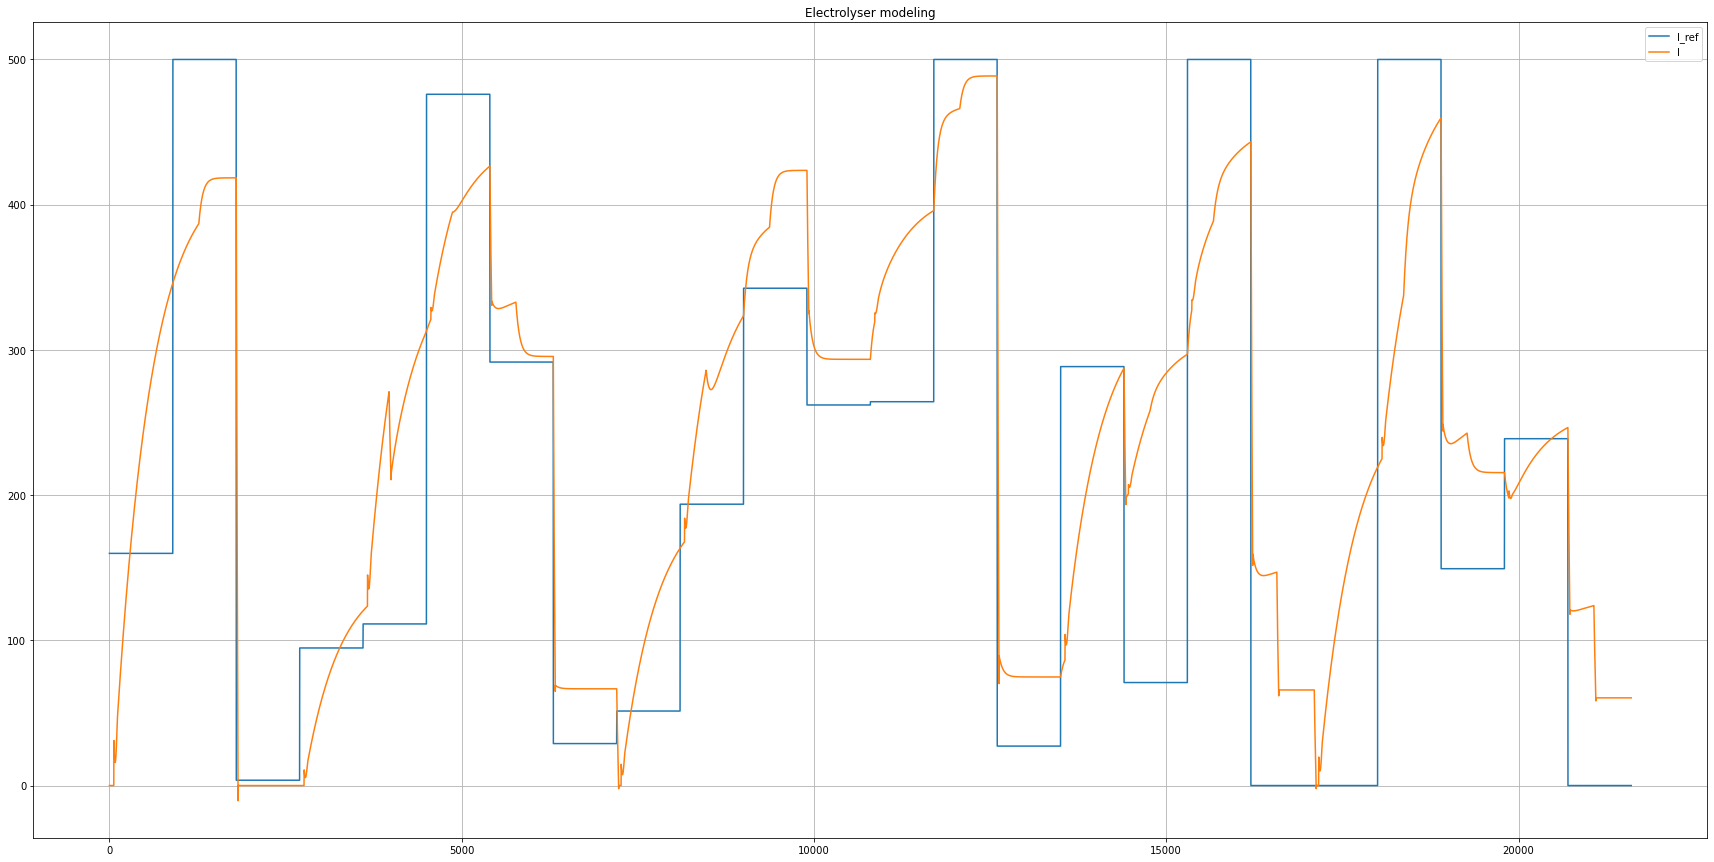

In [18]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(desired_total_Production_in_dinamics, label='I_ref')
plt.plot(total_Production_in_dinamics, label='I')
plt.legend()
plt.grid(visible=True)

In [19]:
num_of_switches

[10, 10, 12, 11, 12]

Manual

In [21]:
[[states, actions, total_reward],
 [desired_total_Production_in_dinamics,
  total_Production_in_dinamics,
  run_out_of_elecs]]                   = rl.generate_episode(env, 
                                                             agent, 
                                                             num_of_steps, 
                                                             show=True, 
                                                             simple_action=False,
                                                             made = True,
                                                             manual = True)

PRref
[ 35.96588399 121.15963738 302.9260288   30.89011569 315.34981087
  63.09913655 108.06986866 222.29464789 231.69103239  30.44782831
 456.41651318 500.         365.82831461 165.27978424 359.12679656
  77.4178955  500.         418.07515603 179.71834498 377.08243262
 286.99467915 259.61856321 500.           0.        ]

state
[0.07193177 0.24231927 0.60585206 0.06178023 0.63069962 0.12619827
 0.21613974 0.4445893  0.46338206 0.06089566 0.91283303 1.
 0.73165663 0.33055957 0.71825359 0.15483579 1.         0.83615031
 0.35943669 0.75416487 0.57398936 0.51923713 1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.38602941 0.38602941 0.38602941
 0.38602941 0.38602941 1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.        

IndexError: list index out of range

In [14]:
num_of_switches = []
# total_run_out_for_elecs = []
for j in range(env.num_of_elecs):
    # total_run_out_for_elecs.append(env.Plant[j].total_run_out)
    num_of_switches.append(env.Plant[j].switch_num)

Production_Error_in_dinamics = np.array(desired_total_Production_in_dinamics) - np.array(total_Production_in_dinamics)


In [15]:
total_run_out_for_elecs = [0] * env.num_of_elecs
for j in range(env.num_of_elecs):
    total_run_out_for_elecs[j] = env.Plant[j].total_run_out
total_run_out_for_elecs = np.array(total_run_out_for_elecs)

In [16]:
reward_account = rl.Reward()

In [17]:
[neg_J, MSE, mean_error, asymetric_error,
max_total_run_out,
run_out_deviation_RMSE] = reward_account.account(Production_Error_in_dinamics, total_run_out_for_elecs)


print('=========================== SCORE')
print('neg_J = ' + str(neg_J))
print('RMSE = ' + str(MSE**0.5))
print('mean_error = ' + str(mean_error))
print('asymetric_error = ' + str(asymetric_error))
print('max_total_run_out = ' + str(max_total_run_out))
#print(min_max_tot_run_out)
print('run_out_deviation_RMSE = ' + str(run_out_deviation_RMSE))
print("switc num = ", end=' ')
print(num_of_switches)
print(sum(num_of_switches))
print(max(total_run_out_for_elecs) / sum(total_run_out_for_elecs))



=========================== SCORE
neg_J = -89.63825898959759
RMSE = 298.79419663199195
mean_error = 270.99566356775284
asymetric_error = 293754.59869010677
max_total_run_out = 0
run_out_deviation_RMSE = 0.0
switc num =  [0, 0, 0, 0, 0]
0
nan


/tmp/ipykernel_19890/1043246370.py:17: RuntimeWarning: invalid value encountered in long_scalars
  print(max(total_run_out_for_elecs) / sum(total_run_out_for_elecs))


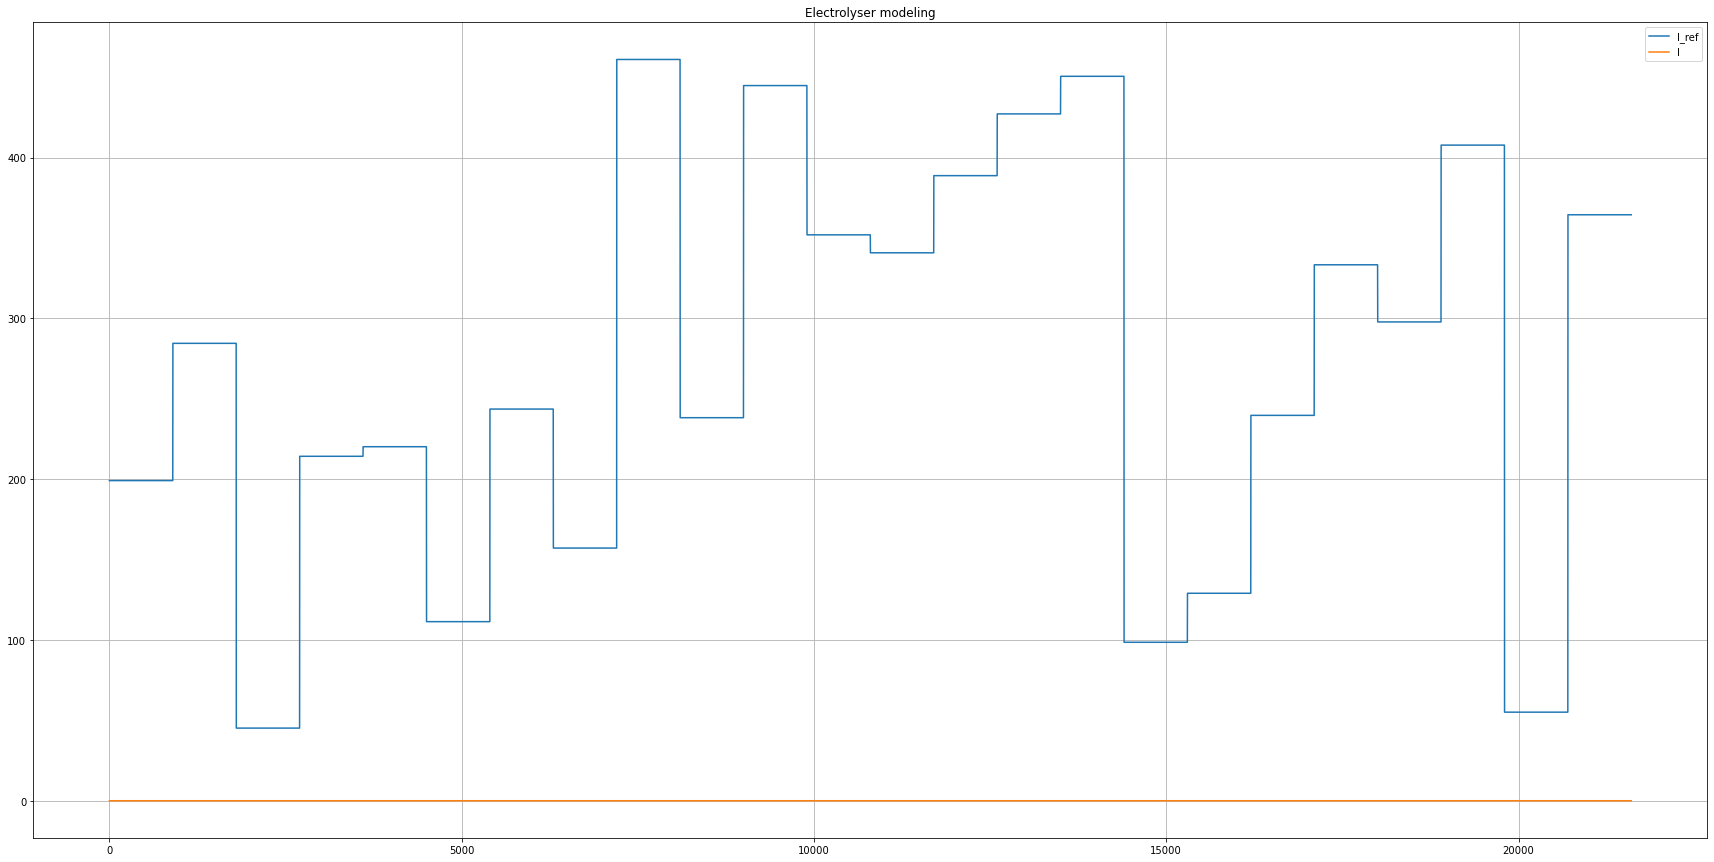

In [18]:
plt.figure(figsize=(30, 15))
plt.title("Electrolyser modeling")
plt.plot(desired_total_Production_in_dinamics, label='I_ref')
plt.plot(total_Production_in_dinamics, label='I')
plt.legend()
plt.grid(visible=True)

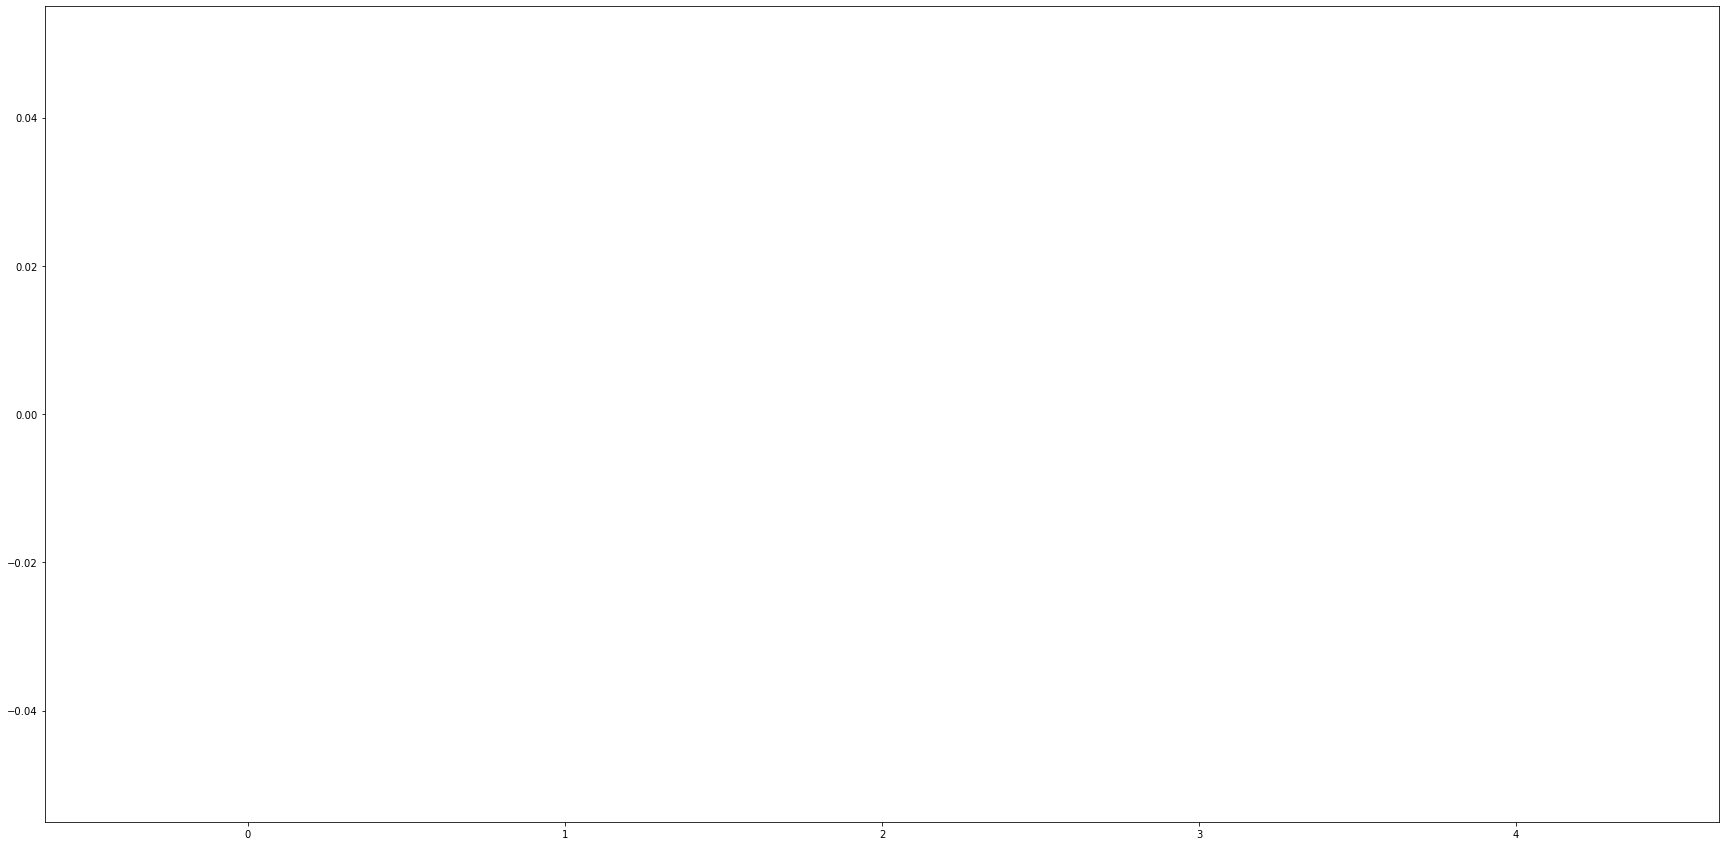

In [19]:
names = list(range(env.num_of_elecs))
plt.figure(figsize=(30, 15))
plt.bar(names, total_run_out_for_elecs)
plt.show()